# Task 3 - Number Recognition

*Varad Deshmukh*

**Instructions** : Handwritten digit recognition system detects scanned images of handwritten digits. Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits.

> ## The MNIST Dataset

The Modified National Institute of Standards and Technology (MNIST) dataset is widely used in deep learning for handwritten digits classification projects. It has 70,000 samples of handwritten digits, used to train the neural network.

We built a deep neural network on the MNIST dataset using `keras`. Specifically, we create a Multilayer Perceptron, meaning a fully connected network, wherein each neuron in one layer is connected to all neurons in the next layer. To train and validate the neural network, the MNIST dataset is used.

> ## Importing the libraries

In [1]:
# import necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam, RMSprop
from keras import backend as K

2023-10-29 12:01:48.192013: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


> ## Loading the dataset

For loading the MNIST dataset, we use the API provided within `keras` to download and extract the images and labels automatically. Once the data is loaded, we count the number of labels for the training and test data.

In [4]:
# import the dataset and load it
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 36s 3us/step


In [5]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print('Train labels : ', dict(zip(unique, counts)))

Train labels :  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
# count the number of unique train labels
unique, counts = np.unique(y_test, return_counts=True)
print('Test labels : ', dict(zip(unique, counts)))

Test labels :  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


> ## Data Visualisation

We select 10 random samples from the MNIST dataset and visualise them.

In [10]:
# sample 10 mnist digits from the training dataset
indexes = np.random.randint(0, X_train.shape[0], size=10)
images = X_train[indexes]
labels = y_train[indexes]

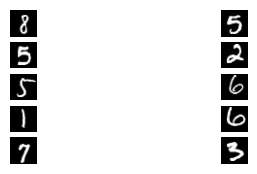

In [12]:
# plot the 10 sample mnist digits
plt.figure(figsize=(5, 2))
for i in range(len(indexes)):
    plt.subplot(5, 2, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

> ## Building the Multilayer Perceptron using `keras`

We move forward to build the model. First we have to import the `keras` layers, which we have already done. Then we compute the number of labels, since the data should be in a correct shape and format.

In [13]:
# compute the number of labels
num_labels = len(np.unique(y_train))

> ## One-Hot Encoding

The labels for the digits in the dataset are in the form of digits, 0 to 9. For feeding these labels into the neural network to train the model, we need to encode these, just as we do with the categorical variables. We employ the One-Hot Enncoding technique for the purpose, using the `to_categorical()` utility in `keras`.

In [14]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## Data Preprocessing

We now compute the dimensions of the images and scale and normalize the pixel value which runs from 0 to 255 into 0 to 1. This makes training easier.

In [15]:
#image dimensions
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [19]:
# resizing and normalizing
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32')
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32')

> ## Network Architecture

We now set the network parameters, i.e the batch size, number of hidden units and the dropout rate.

In [20]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

We now design the model architecture. It will have three layers. We use the `Sequential()` class in `keras` to create the neural network.

In [21]:
# designing the model
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

Now, we view the model summary using the `summary()` method of `keras`.

In [22]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

> ## Implementing the model

It is a three-step process :
1. Compiling the model using `compile()` method
2. Training the model using `fit()` method
3. Evaluating the model performance using `evaluate()` method

In [23]:
# compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [24]:
# train the model
model.fit(X_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 5.6436 - accuracy: 0.5606
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 1.1915 - accuracy: 0.6736
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 1.0022 - accuracy: 0.7265
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.8566 - accuracy: 0.7733
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.7088 - accuracy: 0.8164
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6100 - accuracy: 0.8448
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5328 - accuracy: 0.8629
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4708 - accuracy: 0.8773
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4336 - accuracy: 0.8874
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4123 - accuracy: 0.8

In [25]:
# evaluate model performance
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('The model test accuracy : %.1f%%' % (100.0 * acc))

79/79 [==============================] - 1s 5ms/step - loss: 0.1761 - accuracy: 0.9571
The model test accuracy : 95.7%


Thus, we get a test accuracy of 95.7%, which is extremely good, especially considering the small number of epochs that we run.